In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline

In [2]:
data = pd.read_csv('../data/data_raw.csv')
data.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,9.0,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,3.0,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,2.0,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,Europe,6.0,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,7.0,March,Tuesday


In [3]:
display(data.describe(include=[np.number]))

display(data.describe(exclude=[np.number])) 

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,408.000000,408.000000
mean,48.130952,16.023810,31.751984,4.123016,4.047619,2540.529412,-0.068627
std,74.996426,23.957953,48.520783,1.007302,0.844650,1177.605288,89.674624
min,1.000000,0.000000,0.000000,1.000000,3.000000,315.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,3.000000,1467.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,4.000000,2916.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,5.000000,3348.000000,7.000000
max,775.000000,263.000000,365.000000,5.000000,5.000000,4027.000000,13.000000


,User country,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,User continent,Review month,Review weekday
count,504,504,504,504,504,504,504,504,504,504,408,408,408
unique,48,4,5,2,2,2,2,2,2,21,6,12,7
top,USA,Mar-May,Couples,YES,YES,NO,YES,YES,YES,Tuscany Las Vegas Suites & Casino,North America,September,Sunday
freq,217,128,214,480,480,384,384,456,480,24,232,34,64


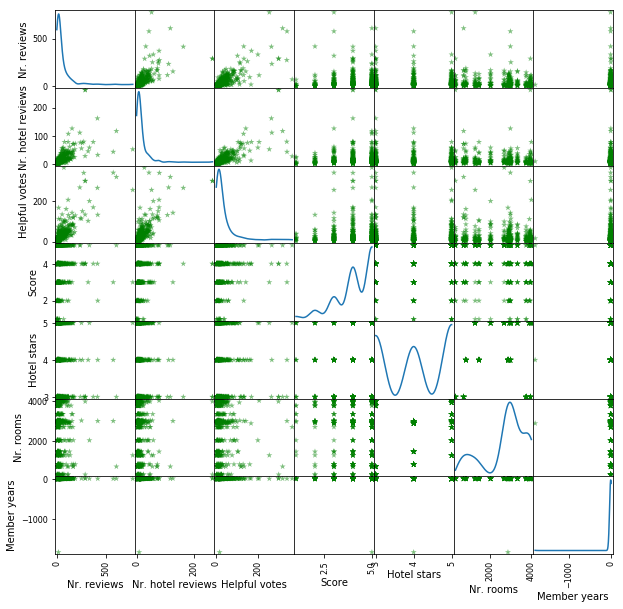

In [4]:
#Draw a boxplot of the city mileage
pd.plotting.scatter_matrix(data,
                           figsize=(10,10), 
                           diagonal='kde', 
                           s=40,                            
                           alpha=0.5,
                           marker='*',
                           color='green');